In [290]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Немного посмотрим на данные

In [866]:
Xtest = pd.read_csv('X_test.csv')
Xtrain = pd.read_csv('X_train.csv')
ytrain = pd.read_csv('y_train.csv')
ytrain['censor of diabetes at followup'] = Xtrain['censor of diabetes at followup']
ytrain['year of followup'] = Xtrain['year of followup']

In [3]:
Xtrain.head(2)

,Age,Gender,site,height,weight,Body Mass Index,Systolic blood pressure,diastolic blood pressure,Fasting plasma glucose,Cholesterol,...,Aspartate transaminase,Blood urea nitrogen,Creatinine clearance rate,Fasting plasma glucose (final visit),Diabetes diagnosed during followup,censor of diabetes at followup,year of followup,smoking status,drinking status,family history of diabetes
0,53,1,13,163.5,64.1,24.0,106.0,68.0,4.83,3.84,...,NaN,5.01,74.8,5.23,NaN,0,2.699521,3.0,3.0,0
1,26,2,3,156.0,68.5,28.1,98.0,68.0,5.12,4.12,...,15.3,3.19,54.7,4.33,NaN,0,2.187543,3.0,3.0,0


In [4]:
Xtest.head(2)

,Age,Gender,site,height,weight,Body Mass Index,Systolic blood pressure,diastolic blood pressure,Fasting plasma glucose,Cholesterol,Triglyceride,High-density lipoprotein cholesterol,Low-density lipoprotein cholesterol,Alanine aminotransferase,Aspartate transaminase,Blood urea nitrogen,Creatinine clearance rate,smoking status,drinking status,family history of diabetes
0,67,2,3,159.0,65.5,25.9,139.0,65.0,3.79,6.33,2.07,NaN,NaN,16.0,NaN,4.88,67.4,3.0,3.0,0
1,27,1,5,177.0,80.0,25.5,105.0,62.0,5.64,5.00,1.40,NaN,NaN,57.0,NaN,5.89,84.0,NaN,NaN,0


In [5]:
ytrain.head(2)

,Id,diabettes in 5 years
0,0,0
1,1,0


In [8]:
Xtrain.isna().sum()/Xtrain.shape[0]

Age                                      0.00000
Gender                                   0.00000
site                                     0.00000
height                                   0.00002
weight                                   0.00000
Body Mass Index                          0.00000
Systolic blood pressure                  0.00011
diastolic blood pressure                 0.00012
Fasting plasma glucose                   0.00000
Cholesterol                              0.02257
Triglyceride                             0.02277
High-density lipoprotein cholesterol     0.44444
Low-density lipoprotein cholesterol      0.43884
Alanine aminotransferase                 0.00837
Aspartate transaminase                   0.58247
Blood urea nitrogen                      0.10080
Creatinine clearance rate                0.05200
Fasting plasma glucose (final visit)     0.00009
Diabetes diagnosed during followup       0.99381
censor of diabetes at followup           0.00000
year of followup    

In [9]:
Xtest.isna().sum()/Xtest.shape[0]

Age                                      0.000000
Gender                                   0.000000
site                                     0.000000
height                                   0.000000
weight                                   0.000000
Body Mass Index                          0.000000
Systolic blood pressure                  0.000107
diastolic blood pressure                 0.000107
Fasting plasma glucose                   0.000000
Cholesterol                              0.023222
Triglyceride                             0.023338
High-density lipoprotein cholesterol     0.448150
Low-density lipoprotein cholesterol      0.442955
Alanine aminotransferase                 0.008450
Aspartate transaminase                   0.581608
Blood urea nitrogen                      0.102573
Creatinine clearance rate                0.053428
smoking status                           0.717060
drinking status                          0.717060
family history of diabetes               0.000000


In [125]:
Xtrain.columns

Index(['Age', 'Gender', 'site', 'height', 'weight', 'Body Mass Index',
       'Systolic blood pressure', 'diastolic blood pressure',
       'Fasting plasma glucose', 'Cholesterol', 'Triglyceride',
       'High-density lipoprotein cholesterol ',
       'Low-density lipoprotein cholesterol', 'Alanine aminotransferase',
       'Aspartate transaminase', 'Blood urea nitrogen',
       'Creatinine clearance rate', 'Fasting plasma glucose (final visit)',
       'Diabetes diagnosed during followup', 'censor of diabetes at followup',
       'year of followup', 'smoking status', 'drinking status',
       'family history of diabetes'],
      dtype='object')

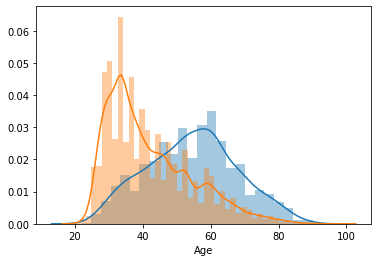

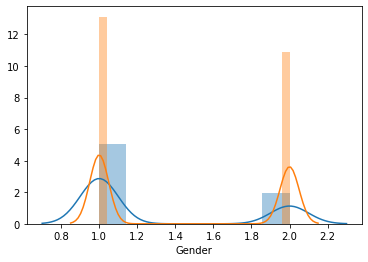

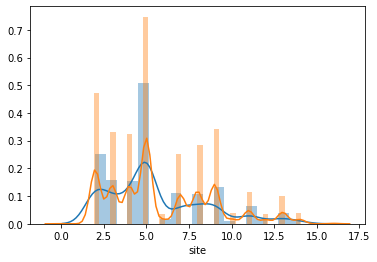

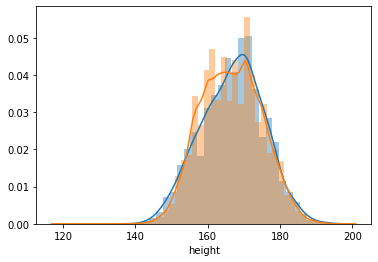

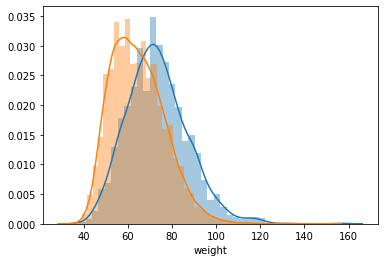

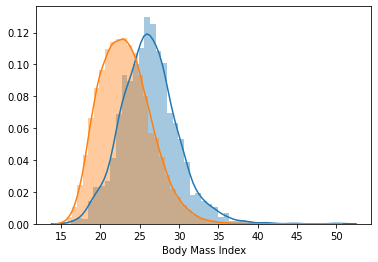

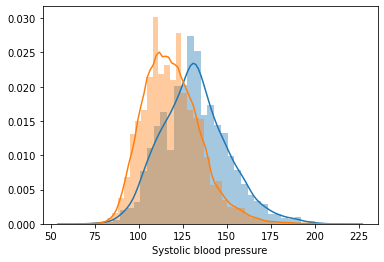

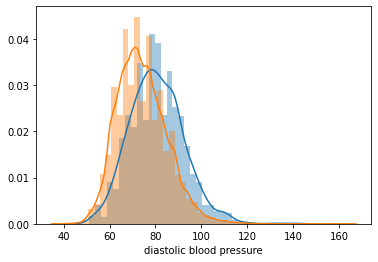

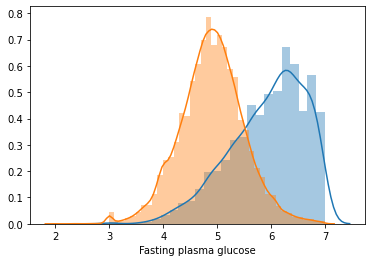

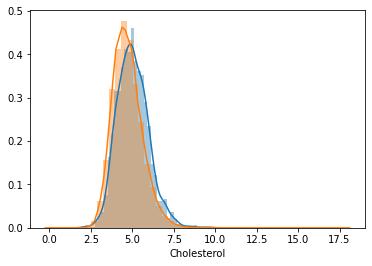

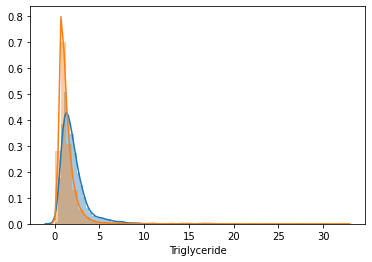

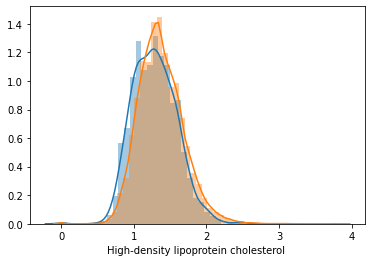

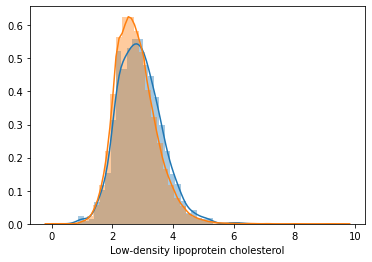

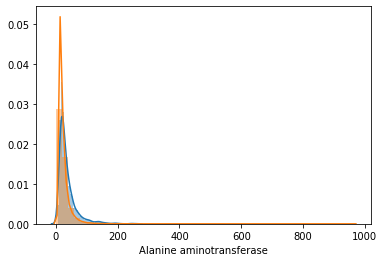

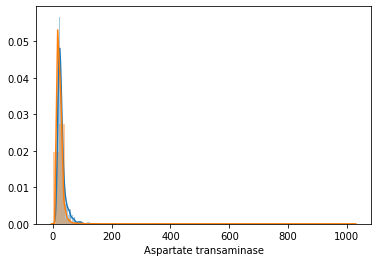

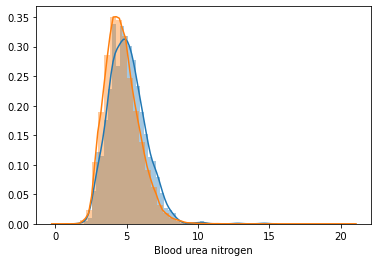

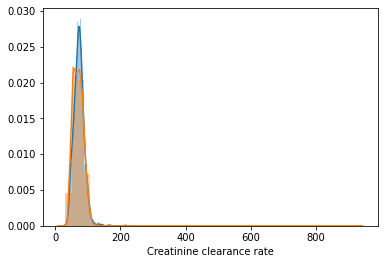

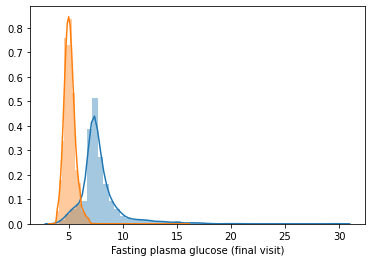

/Users/anastasiapopova/Documents/intelligychain/envs/venv/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/anastasiapopova/Documents/intelligychain/envs/venv/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


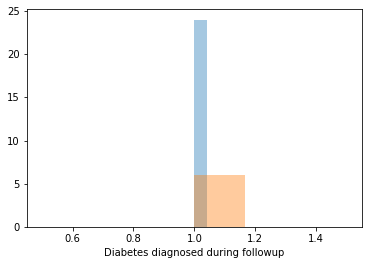

/Users/anastasiapopova/Documents/intelligychain/envs/venv/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


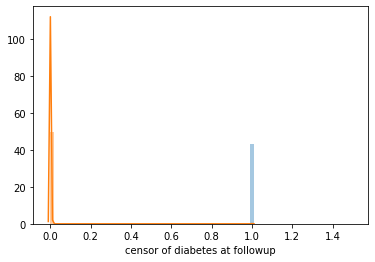

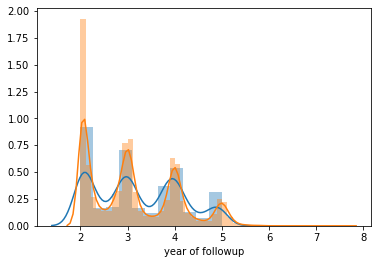

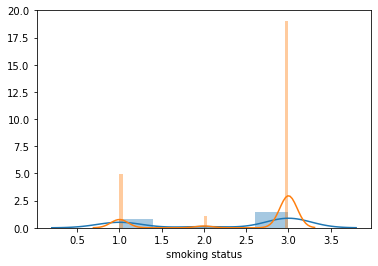

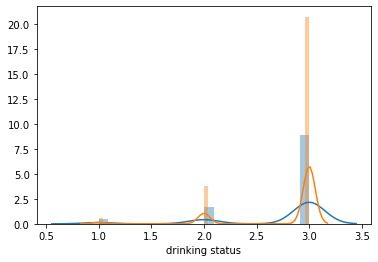

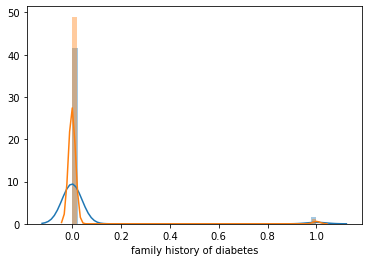

In [131]:
import seaborn as sns
from matplotlib import pyplot as plt

for i in Xtrain.columns:
    sns.distplot(Xtrain[i][ytrain['diabettes in 5 years'] == 1])
    sns.distplot(Xtrain[i][ytrain['diabettes in 5 years'] == 0])
    plt.show()

# Какие-то попытки

In [884]:
from sklearn.metrics import log_loss, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


log_loss_scorer = make_scorer(log_loss)
mean_squared_error_scorer = make_scorer(mean_squared_error)

In [868]:
col_to_drop = set(Xtrain.columns) - set(Xtest.columns)

In [869]:
col_to_drop

{'Diabetes diagnosed during followup',
 'Fasting plasma glucose (final visit)',
 'censor of diabetes at followup',
 'year of followup'}

In [870]:
# Xtrain = Xtrain.drop('Gender', axis=1)
# Xtrain = Xtrain.drop('site', axis=1)

In [871]:
Xtrain.shape, Xtrain.dropna().shape

((100000, 24), (39, 24))

In [872]:
Xtrain[ 'Diabetes diagnosed during followup'].unique()

array([nan,  1.])

In [873]:
Xtrain[['smoking status', 'drinking status', 'Diabetes diagnosed during followup']] = Xtrain[['smoking status', 'drinking status', 'Diabetes diagnosed during followup']].fillna(0)
Xtrain = Xtrain.fillna(Xtrain.median())
Xval = Xval.fillna(Xtrain.median())

In [874]:
ohe_cols = ['Gender', 'site',  'smoking status', 'drinking status', 'family history of diabetes']
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(Xtrain[ohe_cols])
ohe = pd.DataFrame(enc.transform(Xtrain[ohe_cols]).toarray())
Xtrain = pd.concat([Xtrain, ohe], axis=1)
print(ytrain.shape, Xtrain.shape)

(100000, 4) (100000, 51)


In [875]:
# mask = (Xtrain['year of followup'] < 5) & (Xtrain['Diabetes diagnosed during followup'] == 0)
# ytrain = ytrain[mask]
# Xtrain = Xtrain[mask]
Xtrain = Xtrain.drop(col_to_drop, axis=1)#.fillna(0)
Xtrain = Xtrain.drop(ohe_cols, axis=1)
print(ytrain.shape, Xtrain.shape)

(100000, 4) (100000, 42)


In [877]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(Xtrain)
X.shape

(100000, 42)

In [226]:
ytrain.head()

,Id,diabettes in 5 years,censor of diabetes at followup,year of followup
0,0,0,0,2.699521
1,1,0,0,2.187543
2,2,0,0,2.042437
3,3,0,0,2.028747
4,4,0,0,4.950034


In [240]:
model = LogisticRegression(C=0.001)
cross_val_score(model, X, ytrain['diabettes in 5 years'], scoring=log_loss_scorer)

array([0.46585842, 0.4640457 , 0.46585842, 0.4640701 , 0.46225728])

In [277]:
ytrain.head()

,Id,diabettes in 5 years,censor of diabetes at followup,year of followup
0,0,0,0,2.699521
1,1,0,0,2.187543
2,2,0,0,2.042437
3,3,0,0,2.028747
4,4,0,0,4.950034


In [881]:
p = ytrain['diabettes in 5 years'].sum() / ytrain.shape[0]
p

0.01856

In [882]:
model = GaussianNB(priors = [1 - p, p])
cross_val_score(model, Xtrain, ytrain['diabettes in 5 years'], scoring=log_loss_scorer)

array([13.56887091, 12.489509  , 12.66048018, 12.88326029, 13.13194487])

In [312]:
model = RandomForestRegressor(n_estimators=10, n_jobs=8)
cross_val_score(model, Xtrain, ytrain['diabettes in 5 years'], scoring=log_loss_scorer)

array([0.24835442, 0.27202478, 0.26825141, 0.26521737, 0.23987376])

In [885]:
model = RandomForestClassifier(n_estimators=10, class_weight='balanced', n_jobs=8)
cross_val_score(model, Xtrain, ytrain['censor of diabetes at followup'], scoring=log_loss_scorer)

array([0.70113784, 0.69077637, 0.69422985, 0.67868752, 0.68041413])

0.12 -> 0.09

In [314]:
cross_val_score(model, X, ytrain['year of followup'].astype(float).values, scoring=mean_squared_error_scorer)

array([0.74884029, 0.76507346, 0.76398164, 0.76049747, 0.75531038])

In [878]:
regresion = LinearRegression()
#regresion.fit(X.fillna(0)[:1000], ytrain['year of followup'].fillna(0)[:1000])
cross_val_score(regresion, X, ytrain['year of followup'].astype(float).values, scoring=mean_squared_error_scorer)

array([0.75401002, 0.76862853, 0.7534297 , 0.77404512, 0.76091096])

In [879]:
regresion 

0.5685311102604004

In [880]:
ytrain['year of followup']

0        2.699521
1        2.187543
2        2.042437
3        2.028747
4        4.950034
           ...   
99995    4.177960
99996    5.073238
99997    2.017796
99998    2.735113
99999    2.050650
Name: year of followup, Length: 100000, dtype: float64

In [ ]:
import statsmodels.api as sm
model = sm.GLM(ytrain['diabettes in 5 years'], X_train_np.astype(float), family=sm.families.Binomial())
results = model.fit()
print(results.summary())

In [276]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

for train_index, test_index in kf.split(Xtrain.values):
    X_train, X_test = Xtrain.values[train_index], Xtrain.values[test_index]
    y_train, y_test = ytrain.values[train_index], ytrain.values[test_index]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    print(log_loss(pred, y_test))
        

array([0.62694948, 0.63488958, 0.62574415, 0.64218767, 0.62554432])

In [266]:
ytrain['year of followup'].astype(float).values[0]

2.6995208761000002

In [254]:
ytrain['year of followup'].unique()

array([2.69952088, 2.18754278, 2.04243669, ..., 4.7063655 , 4.68720055,
       4.62422998])

In [245]:
 ytrain['year of followup'].values

array([2.69952088, 2.18754278, 2.04243669, ..., 2.01779603, 2.73511294,
       2.05065024])

In [ ]:
cross_val_score(model, Xtrain, ytrain['diabettes in 5 years'], scoring=log_loss_scorer)

In [161]:
cross_val_score(model, Xtrain, ytrain['diabettes in 5 years'], scoring=log_loss_scorer)

array([0.11346322, 0.12559273, 0.12772721, 0.12403695, 0.11951633])

# Medium baseline

In [316]:
from sklearn.model_selection import train_test_split

In [1041]:
#X = pd.read_csv('X_test.csv')
X = pd.read_csv('X_train.csv')
y = pd.read_csv('y_train.csv')
y['censor of diabetes at followup'] = X['censor of diabetes at followup']
y['year of followup'] = X['year of followup']
y['Fasting plasma glucose (final visit)'] = X['Fasting plasma glucose (final visit)']
y['Diabetes diagnosed during followup'] = X['Diabetes diagnosed during followup']


ohe_cols = ['Gender', 'site',  'smoking status', 'drinking status', 'family history of diabetes']
X[ohe_cols] = X[ohe_cols].fillna(0)
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X[ohe_cols])
print(y.shape, X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X_train.reset_index()
X_test = X_test.reset_index()
y_train = y_train.reset_index()
y_test = y_test.reset_index()

(100000, 6) (100000, 24)


In [1042]:
# таких мало - дропнем их
mask = ~y_train['Fasting plasma glucose (final visit)'].isna()
X_train = X_train[mask]
y_train = y_train[mask]

# mask = y_train['Diabetes diagnosed during followup'].isna()
# X_train = X_train[mask]
# y_train = y_train[mask]
X_train = X_train.reset_index()
X_test = X_test.reset_index()
y_train = y_train.reset_index()
y_test = y_test.reset_index()
print(X_train.shape, y_train.shape)

(69995, 26) (69995, 8)


In [ ]:
# Вот тут много пропусков, заменим их поумному 'Aspartate transaminase', 'smoking status', 'drinking status', High-density lipoprotein cholesterol
# Low-density lipoprotein cholesterol
cols_for_model = ['Age', 'Gender', 'height', 'weight', 'Body Mass Index', 'Systolic blood pressure',
                  'diastolic blood pressure', 'Fasting plasma glucose', 'Cholesterol',
                 'Triglyceride', 'Alanine aminotransferase', 'Blood urea nitrogen', 'Creatinine clearance rate',
                  'family history of diabetes']
X_train_small = X_train.copy()
X_train_small[cols_for_model] = X_train_small[cols_for_model].fillna(X_train_small[cols_for_model].mean())

mask = ~X_train_small['Aspartate transaminase'].isna()
y_small = X_train_small['Aspartate transaminase'][mask]
X_train_small = X_train_small[cols_for_model][mask]

aspartate_model = LinearRegression()
print(cross_val_score(aspartate_model, X_train_small, y_small, scoring=mean_squared_error_scorer))
aspartate_model.fit(X_train_small, y_small)

aspartate_pred_train = aspartate_model.predict(X_train[cols_for_model].fillna(X_train[cols_for_model].mean()))
aspartate_pred_test = aspartate_model.predict(X_test[cols_for_model].fillna(X_test[cols_for_model].mean()))

X_train['Aspartate transaminase'][X_train['Aspartate transaminase'].isna()] = aspartate_pred_train
X_test['Aspartate transaminase'][X_test['Aspartate transaminase'].isna()] = aspartate_pred_test


# ------
X_train_small = X_train.copy()
X_train_small[cols_for_model] = X_train_small[cols_for_model].fillna(X_train_small[cols_for_model].mean())

mask = ~X_train_small['smoking status'].isna()
y_small = X_train_small['smoking status'][mask]
X_train_small = X_train_small[cols_for_model][mask]

smoking_model = LinearRegression()
print(cross_val_score(smoking_model, X_train_small, y_small, scoring=mean_squared_error_scorer))
smoking_model.fit(X_train_small, y_small)

smoking_pred_train = smoking_model.predict(X_train[cols_for_model].fillna(X_train[cols_for_model].mean()))
smoking_pred_test = smoking_model.predict(X_test[cols_for_model].fillna(X_test[cols_for_model].mean()))

X_train['smoking status'][X_train['smoking status'].isna()] = smoking_pred_train
X_test['smoking status'][X_test['smoking status'].isna()] = smoking_pred_test

In [1043]:
ohe = pd.DataFrame(enc.transform(X_train[ohe_cols]).toarray())
X_train = pd.concat([X_train, ohe], axis=1)
X_train = X_train.drop(ohe_cols, axis=1)

ohe = pd.DataFrame(enc.transform(X_test[ohe_cols]).toarray())
X_test = pd.concat([X_test, ohe], axis=1)
X_test = X_test.drop(ohe_cols, axis=1)

In [1044]:
y_train['Diabetes diagnosed during followup'] = y_train['Diabetes diagnosed during followup'].fillna(0)
y_test['Diabetes diagnosed during followup'] = y_test['Diabetes diagnosed during followup'].fillna(0)

y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_train.mean())

X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())

In [1045]:
col_to_drop = ['Diabetes diagnosed during followup',
'Fasting plasma glucose (final visit)',
 'censor of diabetes at followup',
 'year of followup']

In [1046]:
X_train = X_train.drop(col_to_drop, axis=1)
X_test = X_test.drop(col_to_drop, axis=1)

In [1047]:
# попытки предсказания не хватающих колонок
# model = LinearRegression().fit(X_train, y_train['Fasting plasma glucose (final visit)'].astype(float).values)
# X_test['Fasting plasma glucose (final visit)'] = model.predict(X_test)
# вот это поаккуратнее по фолдам сделать. не хорошо учиться и предсказывать на одном и том же
# X_train['Fasting plasma glucose (final visit)'] = model.predict(X_train) 
# print(X_test.shape)

In [1048]:
# у них был непропорционально большой коэффициент в модели
X_train = X_train.drop([2, 16], axis=1)
X_test = X_test.drop([2, 16], axis=1)

In [1049]:
import statsmodels.api as sm

In [1050]:
#gls, ols, glm , QuantReg,RecursiveLS, WLS, GEE
model = sm.GLM(y_train['diabettes in 5 years'], X_train.astype(float),
            family=sm.families.Binomial(link=sm.genmod.families.links.logit()), maxiter=100) 
#              use_t=False, scale=0.001, wls_method='qr')
results = model.fit()

In [1051]:
y_pred = results.predict(X_test.astype(float))
y_pred_train = results.predict(X_train.astype(float))

In [1052]:
print(log_loss(y_train["diabettes in 5 years"], y_pred_train))
print(log_loss(y_test["diabettes in 5 years"], y_pred))

0.061695724288489906
0.059804441298513804


План дальше:
1) заменить пропуски поумнее (я бы их предсказывала)
2) предсказывать неизвестные в тесте поля из тренировки (дальше либо добавляем, как признак, к старым, либо делаем новую модель на этих признаках) 
3) отбор признаков
4) другие модели, тюнинг гиперпараметров, блендинг

In [464]:
model = sm.GLM(y_train[['year of followup', 'diabettes in 5 years']], X_train.astype(float), family=sm.families.Binomial())
results = model.fit()
#print(results.summary())

In [465]:
y_pred = results.predict(X_test.astype(float))
y_pred_train = results.predict(X_train.astype(float))

In [466]:
y_pred

58907    0.848742
93639    0.941694
30416    0.999499
50092    0.998966
80478    0.999929
           ...   
35888    0.995257
58379    0.999426
12788    0.988916
48552    0.995516
96858    0.999759
Length: 20000, dtype: float64

In [886]:
print(mean_squared_error(y_train["year of followup"], y_pred_train))
print(mean_squared_error(y_test["year of followup"], y_pred))

5.386316381751745
5.404843992073705


In [854]:
for i in X_train.columns:
    model = sm.GLM(y_train['diabettes in 5 years'], X_train.drop(i, axis=1).astype(float), family=sm.families.Binomial())
    results = model.fit()
    y_pred = results.predict(X_test.drop(i, axis=1).astype(float))
    print(i)
    print(f'test loglloss = {log_loss(y_test["diabettes in 5 years"], y_pred)}')

Age
test loglloss = 0.06201969258326308
height
test loglloss = 0.060053885646458326
weight
test loglloss = 0.06008570336409176
Body Mass Index
test loglloss = 0.05993493829499348
Systolic blood pressure
test loglloss = 0.05978785719610719
diastolic blood pressure
test loglloss = 0.05977580563463946
Fasting plasma glucose
test loglloss = 0.07463612373348698
Cholesterol
test loglloss = 0.05978059924669612
Triglyceride
test loglloss = 0.059779744811882765
High-density lipoprotein cholesterol 
test loglloss = 0.059821675235510116
Low-density lipoprotein cholesterol
test loglloss = 0.05982668368965775
Alanine aminotransferase
test loglloss = 0.05990747082526041
Aspartate transaminase
test loglloss = 0.05976950361530175
Blood urea nitrogen
test loglloss = 0.059797126924680775
Creatinine clearance rate
test loglloss = 0.06010207457876215
0
test loglloss = 0.059808828998863674
1
test loglloss = 0.05980882899886376
2
test loglloss = 0.05980882899886389
3
test loglloss = 0.05980882899886362
4
te